In [1]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from wordpress_graph.paths import DATA_DIR, PROJECT_DIR


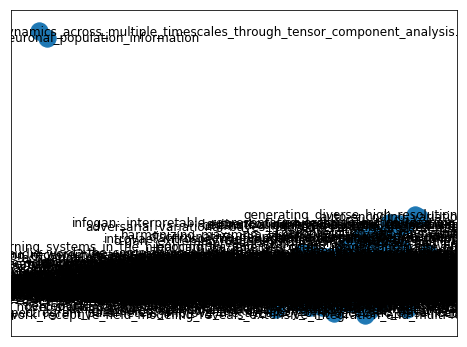

In [5]:
#G = nx.karate_club_graph()
G = nx.read_gpickle((DATA_DIR/"network_path.gpickle").as_posix())
fig, ax = plt.subplots(1, 1, figsize=(8, 6));
nx.draw_networkx(G, ax=ax)

### Cluster communiities

In [6]:
import community
import seaborn as sns

In [7]:
partition = community.best_partition(G)
set(partition.values())

{0, 1, 2, 3, 4, 5, 6, 7}

### Create dictionary of graph

In [8]:
graph_data = { 'nodes': [], 'links': [] }
for nodei, node in enumerate(G.nodes()):
    graph_data['nodes'].append({
            "name": node,
            "group":  partition[node]

        })
node_num = {node['name']:nodei for nodei, node in enumerate(graph_data['nodes'])}
for edge, edge_val in G.edges().items():
    graph_data['links'].append({
        "source" : node_num[edge[0]],
        "target" : node_num[edge[1]],
        #"value" : edge_val['weight']
    })

In [9]:
"""nodes = [{'name': str(i), 'group': g.node[i]['club']}
         for i in g.nodes()]
links = [{'source': u[0], 'target': u[1]}
         for u in g.edges()]

graph_data = {'nodes': nodes, 'links':links}"""

"nodes = [{'name': str(i), 'group': g.node[i]['club']}\n         for i in g.nodes()]\nlinks = [{'source': u[0], 'target': u[1]}\n         for u in g.edges()]\n\ngraph_data = {'nodes': nodes, 'links':links}"

In [10]:
graph_data

{'nodes': [{'name': 'critical_behavior_from_deep_dynamics:_a_hidden_dimension_in_natural_language',
   'group': 0},
  {'name': 'adversarially_learned_inference', 'group': 1},
  {'name': 'infogan:_interpretable_representation_learning_by_information_maximizing_generative_adversarial_nets',
   'group': 1},
  {'name': 'improved_techniques_for_training_gans', 'group': 1},
  {'name': 'auto-encoding_variational_bayes', 'group': 1},
  {'name': 'autoencoding_beyond_pixels_using_a_learned_similarity_metric',
   'group': 1},
  {'name': 'cognitive_science_in_the_era_of_artificial_intelligence:_a_roadmap_for_reverse-engineering_the_infant_language-learner',
   'group': 0},
  {'name': 'librispeech', 'group': 2},
  {'name': 'zebra_finches_exhibit_speaker-independent_phonetic_perception_of_human_speech',
   'group': 3},
  {'name': 'how_many_syllables_does_english_have?', 'group': 0},
  {'name': 'the_natural_history_of_sound_localization_in_mammals_–_a_story_of_neuronal_inhibition',
   'group': 3},
  

In [11]:
with open('graph.json', 'w') as f:
    json.dump(graph_data,
              f, indent=4,)

In [12]:
%%html
<div id="d3-example"></div>
<style>
.node {stroke: #fff; stroke-width: 1.5px;}
.link {stroke: #999; stroke-opacity: .6;}
</style>

In [13]:
%%javascript
// We load the d3.js library from the Web.
require.config({paths:
    {d3: "http://d3js.org/d3.v3.min"}});
require(["d3"], function(d3) {
  // The code in this block is executed when the
  // d3.js library has been loaded.

  // First, we specify the size of the canvas
  // containing the visualization (size of the
  // <div> element).
  var width = 300, height = 300;

  // We create a color scale.
  var color = d3.scale.category10();

  // We create a force-directed dynamic graph layout.
  var force = d3.layout.force()
    .charge(-120)
    .linkDistance(30)
    .size([width, height]);

  // In the <div> element, we create a <svg> graphic
  // that will contain our interactive visualization.
  var svg = d3.select("#d3-example").select("svg")
  if (svg.empty()) {
    svg = d3.select("#d3-example").append("svg")
          .attr("width", width)
          .attr("height", height);
  }

  // We load the JSON file.
  d3.json("graph.json", function(error, graph) {
    // In this block, the file has been loaded
    // and the 'graph' object contains our graph.

    // We load the nodes and links in the
    // force-directed graph.
    force.nodes(graph.nodes)
      .links(graph.links)
      .start();

    // We create a <line> SVG element for each link
    // in the graph.
    var link = svg.selectAll(".link")
      .data(graph.links)
      .enter().append("line")
      .attr("class", "link");

    // We create a <circle> SVG element for each node
    // in the graph, and we specify a few attributes.
    var node = svg.selectAll(".node")
      .data(graph.nodes)
      .enter().append("circle")
      .attr("class", "node")
      .attr("r", 5)  // radius
      .style("fill", function(d) {
         // The node color depends on the club.
         return color(d.group);
      })
      .call(force.drag);

    // The name of each node is the node number.
    node.append("title")
        .text(function(d) { return d.name; });

    // We bind the positions of the SVG elements
    // to the positions of the dynamic force-directed
    // graph, at each time step.
    force.on("tick", function() {
      link.attr("x1", function(d){return d.source.x})
          .attr("y1", function(d){return d.source.y})
          .attr("x2", function(d){return d.target.x})
          .attr("y2", function(d){return d.target.y});

      node.attr("cx", function(d){return d.x})
          .attr("cy", function(d){return d.y});
    });
  });
});


<IPython.core.display.Javascript object>